In [1]:
from f3dasm.simulation.benchmark_functions import Levy, Ackley, Schwefel
from f3dasm.optimization.pygmo_implementations import CMAES, PSO, XNES, SGA
from f3dasm.optimization.gradient_based_algorithms import SGD, Momentum, Adam
from f3dasm.optimization.gpyopt_implementations import BayesianOptimization
from f3dasm.base.designofexperiments import DesignSpace
from f3dasm.base.space import ContinuousParameter
from f3dasm.sampling.samplers import LatinHypercubeSampling

from jax import grad

In [2]:
def make_nd_continuous_design(bounds: list, dimensions: int):
    input_space, output_space = [], []
    for dim in range(dimensions):
        input_space.append(ContinuousParameter(name=f"x{dim}", lower_bound=bounds[0], upper_bound=bounds[1]))

    output_space.append(ContinuousParameter(name="y"))

    return DesignSpace(input_space=input_space, output_space=output_space)

In [3]:
dimensions= 2
hyperparameters = {}
seed = 42
iterations = 20

In [4]:
design = make_nd_continuous_design(bounds=[-10.,10.], dimensions=dimensions)

# Sampler
lhs_sampler = LatinHypercubeSampling(doe=design, seed=seed)
data = lhs_sampler.get_samples(numsamples=1)
data.data


input           output
         x0        x1      y
0 -2.509198  9.014286    NaN

In [5]:
levy = Levy(noise=False)

# Evaluate the initial samples
data.add_output(output=levy.eval(data),label="y")
data.data

# algorithm = pg.algorithm(pg.cmaes(gen=1, memory=True, seed=42, force_bounds=True))
bo = SGD(data=data, hyperparameters=hyperparameters, seed=seed)
data.data

input               output
         x0        x1          y
0 -2.509198  9.014286  12.362575

In [6]:
bo.iterate(iterations=iterations, function=levy)
new_data = bo.extract_data()

In [7]:
new_data.data

input               output
          x0        x1          y
0  -2.509198  9.014286  12.362575
1  -2.489804  9.001434  12.308392
2  -2.468657  8.991149  12.252162
3  -2.445642  8.982901  12.190771
4  -2.420647  8.976275  12.121709
5  -2.393565  8.970942  12.042828
6  -2.364303  8.966644  11.952200
7  -2.332781  8.963175  11.848071
8  -2.298944  8.960374  11.728853
9  -2.262761  8.958110  11.593175
10 -2.224235  8.956278  11.439951
11 -2.183409  8.954795  11.268478
12 -2.140369  8.953595  11.078532
13 -2.095248  8.952622  10.870464
14 -2.048228  8.951834  10.645265
15 -1.999536  8.951195  10.404598
16 -1.949444  8.950677  10.150766
17 -1.898258  8.950257   9.886633
18 -1.846306  8.949916   9.615481
19 -1.793933  8.949640   9.340832
20 -1.741483  8.949416   9.066242

In [8]:
new_data.get_output_data().idxmin()

y    20
dtype: int64

In [9]:
g = new_data.get_output_data().to_numpy().ravel()

In [10]:
new_data.get_n_best_output_samples(nosamples=10)

input               output
          x0        x1          y
20 -1.741483  8.949416   9.066242
19 -1.793933  8.949640   9.340832
18 -1.846306  8.949916   9.615481
17 -1.898258  8.950257   9.886633
16 -1.949444  8.950677  10.150766
15 -1.999536  8.951195  10.404598
14 -2.048228  8.951834  10.645265
13 -2.095248  8.952622  10.870464
12 -2.140369  8.953595  11.078532
11 -2.183409  8.954795  11.268478

In [11]:
len(new_data.data)

21

(<Figure size 504x504 with 1 Axes>,
 <Axes3DSubplot:xlabel='$X_{1}$', ylabel='$X_{2}$'>)

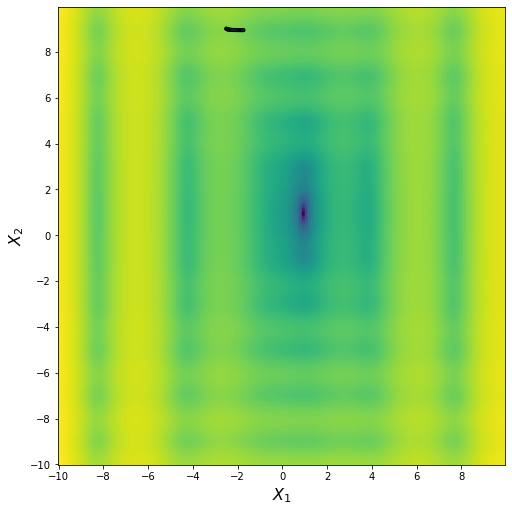

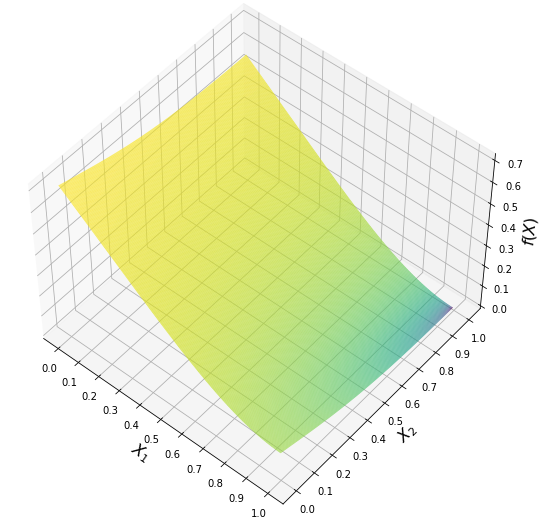

In [12]:
levy.plot_data(data=new_data, px=300, domain=[-10.,10.])
levy.plot()

In [13]:
pso.hyperparameters

NameError: name 'pso' is not defined